# Sears Test Case Plots

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import os
import pandas as pd


In [10]:
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [11]:
%matplotlib inline

In [12]:
def read_variables(file_name):
    with open(file_name, 'r') as csvfile:
        line = csv.reader(csvfile, delimiter=',')


# Discretisation
M = 16
N = 80
MstarFact = 30
nsurf = 1
rho = 1.225
c_ref = 1.8288

# Flight Conditions
u_inf = 50
alpha_deg = 0
main_ea = 0.0
AR = 100

# Linear settings
remove_predictor = False
use_sparse = False
integration_order = 2

# ROM Settings
algorithm = 'dual_rational_arnoldi'
frequency_continuous_k = np.array([0.0])
krylov_r = 15

# Case Admin
case_route = os.path.abspath('.')
results_folder = case_route + '/res/'
fig_folder = case_route + '/figs_esa/'
os.system('mkdir -p %s' % results_folder)
os.system('mkdir -p %s' % fig_folder)
case_name = 'sears_uinf%04d_AR%02d_M%dN%dMs%d_KR%d_sp%i' % (u_inf, AR, M, N, MstarFact, krylov_r, use_sparse)
#
data = pd.read_csv(results_folder + 'freq_data_' + case_name+'.csv')

Y_rom = np.zeros((len(data['kv'])))
Y_rom += data['Y_ROM_i']*1j + data['Y_ROM_r']
Y_rom *= u_inf / np.pi / 2 * np.exp(-1j*data['kv']*(-1.75/M)/0.5)

In [63]:
def custom_axes(ax, xticks, xticklabels, yticks, yticklabels):
    # ax.spines['top'].set_visible(False)
    # ax.spines['right'].set_visible(False)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    
    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabels)

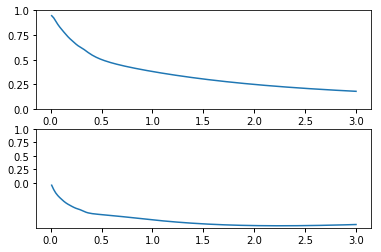

In [65]:
fig, ax = plt.subplots(nrows=2, sharex=False)

yticks1 = np.linspace(0, 1, 5)
ytickslabels= np.linspace(0, 1, 5)

xticks = np.linspace(0, 3, 7)
xticklabels = np.linspace(0, 3, 7)

ax[0].plot(data['kv'], np.abs(Y_rom))
ax[1].plot(data['kv'], np.angle(Y_rom))

custom_axes(ax[0], xticks, xticklabels, yticks1, ytickslabels)
custom_axes(ax[1], xticks, xticklabels, yticks1, ytickslabels)


